In [62]:
 import pandas as pd
import numpy as np
import joblib as jl
import matplotlib.pyplot as mtl
import seaborn as sb
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [93]:
data=pd.read_excel("E:/Complicated_math_ops/Comp_Math/Math.xlsx")

In [94]:
table=pd.DataFrame(data)

In [95]:
table.describe

<bound method NDFrame.describe of        alpha  beta  gama  theta        result
0        111  -495     7      4  15325.034681
1        190   811     3      2   2677.521951
2        227   157     8     -5  33241.900047
3         63  -336     6     -4   6768.809982
4        130    79     1     -5    240.657964
...      ...   ...   ...    ...           ...
49994     61  -645     5      0   1191.785330
49995      8    89     5      4   3393.892448
49996    223  -937     2      5  -2777.195716
49997    232  -285     3      0   -609.634512
49998     58   331     3      6   1237.226855

[49999 rows x 5 columns]>

In [96]:
table.describe()

,alpha,beta,gama,theta,result
count,49999.000000,49999.000000,49999.00000,49999.000000,49999.000000
mean,125.298486,-3.414188,5.50377,-0.007700,22094.393643
std,72.024934,576.223324,2.87498,3.734032,31682.736530
min,1.000000,-1000.000000,1.00000,-6.000000,-2997.887571
25%,63.000000,-501.000000,3.00000,-3.000000,896.327215
50%,126.000000,-7.000000,6.00000,0.000000,5549.086072
75%,188.000000,497.000000,8.00000,3.000000,32772.208352
max,250.000000,1000.000000,10.00000,6.000000,103003.182483


In [105]:
X=data[['alpha','beta','gama','theta']]
y=data['result']

In [106]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)
m=LinearRegression()
m.fit(x_train,y_train)
y_pred=m.predict(x_test)
print(pd.DataFrame({'real':y_test,'predicted':y_pred}))
print(m.predict([[120,-250,10,-4]]))

                real     predicted
33552    -542.744727 -20016.628010
9427    34405.244143  46829.891356
199     56938.860464  52225.085377
12447    6034.597271  20602.638612
39488     109.581448 -10286.622905
...              ...           ...
15168     847.612702  -9625.918582
34874   35580.249065  48384.183845
39316  101210.385398  65109.111271
42190   32763.827047  45516.474961
15109     606.132095   -814.195064

[15000 rows x 2 columns]
[62834.0150321]


E:\Complicated_math_ops\Comp_Math\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [107]:
lr_score= r2_score(y_test,y_pred)  

In [108]:
print(lr_score)

0.7016799355442762


In [109]:
rg=RandomForestRegressor()
rg.fit(x_train,y_train)

RandomForestRegressor()

In [110]:
rg_pred=rg.predict(x_test) 

In [111]:
print(rg_pred)

[  -543.05421441  34404.43654878  56934.77009509 ... 101207.83459907
  32763.24338736    606.56242278]


In [112]:
r2_score(y_test,rg_pred)

0.9999999968118528

In [113]:
print(y_test.tail())

15168       847.612702
34874     35580.249065
39316    101210.385398
42190     32763.827047
15109       606.132095
Name: result, dtype: float64


In [65]:
length=len(y_pred)
print(y_pred[length-1])

-20432.06957007385


In [131]:
xgb=XGBRegressor()
xgb.fit(x_train,y_train)
xgb_pred=xgb.predict(x_test)
r2_score(y_test,xgb_pred)

0.9999995251390311

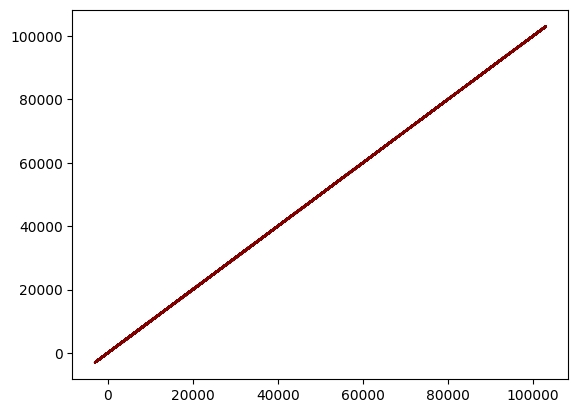

In [133]:
mtl.plot(y_test,xgb_pred,color="maroon")

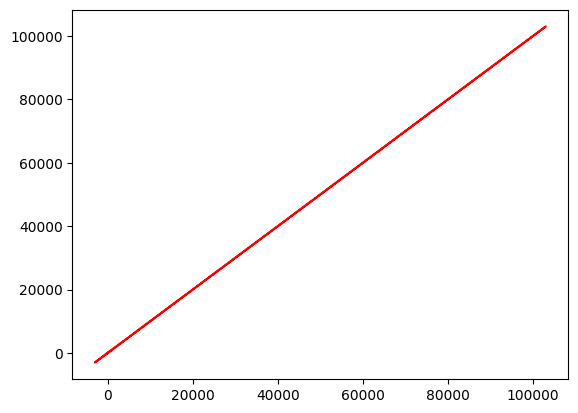

In [119]:
mtl.plot(y_test,rg_pred,color="red")

In [128]:
print(rg.predict([[34,452,2,4]]))

[1388.23382374]


E:\Complicated_math_ops\Comp_Math\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [129]:
print(rg.predict([[125,234,5,2.9]]))

[3828.18805991]


E:\Complicated_math_ops\Comp_Math\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [134]:
print(xgb.predict([[34,452,2,4]]))

[1391.5796]


In [135]:
print(xgb.predict([[125,234,5,2.9]]))

[3850.9287]


In [137]:
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)
gb_pred=gb.predict(x_test)
r2_score(y_test,gb_pred)

0.9999931015686956

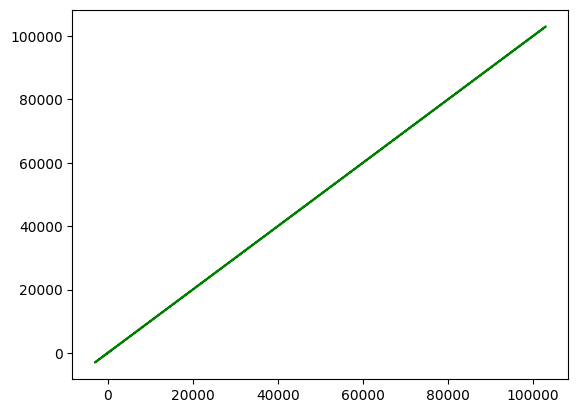

In [138]:
mtl.plot(y_test,rg_pred,color="green")

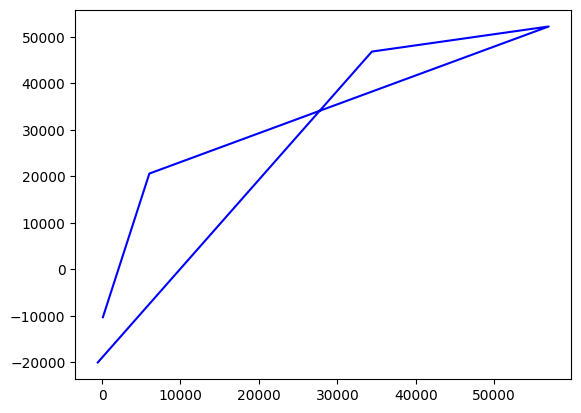

In [150]:
mtl.plot(y_test[ :5 ],y_pred[ :5 ],color="blue")

In [149]:
m.fit(x_train,y_train)


LinearRegression()

In [144]:
lr1_pred=m.predict(x_test)


In [145]:
r2_score(y_test,lr1_pred)

0.7016799355442762

In [152]:
rg_final=rg.fit(X,y)

In [154]:
jl.dump(rg_final,'math.xyz')

['math.xyz']

In [156]:
arab=jl.load('math.xyz')


In [157]:
arab.predict([[125,234,5,2.9]])

E:\Complicated_math_ops\Comp_Math\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([3828.67274979])